# Objective

This project based on the dataset 'BMW used car listing' from Kaggle (https://www.kaggle.com/datasets/mysarahmadbhat/bmw-used-car-listing?select=bmw.csv) showcases my ability to explore, visualise and prepare data appropriately and subsequently develop a machine learning model, here an XGBoost Regression.

# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import itertools
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Exploratory Data Analysis

In [2]:
df = pd.read_csv(r"C:\Users\felis\Github_DataScience\BMW_Portfolio\UsedCars\usedcars_dataset.csv", delimiter = ";")

In [3]:
df.shape

(10781, 10)

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Unnamed: 9
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,NaN
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,NaN
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,NaN
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,01. Mai,NaN
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,NaN


Delete the column 'Unnamed'

In [5]:
df.drop(columns = "Unnamed: 9", inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         10781 non-null  object
 1   year          10781 non-null  int64 
 2   price         10781 non-null  int64 
 3   transmission  10781 non-null  object
 4   mileage       10781 non-null  int64 
 5   fuelType      10781 non-null  object
 6   tax           10781 non-null  int64 
 7   mpg           10781 non-null  object
 8   engineSize    10781 non-null  object
dtypes: int64(4), object(5)
memory usage: 758.2+ KB


The columns mpg and engineSize seem to have the wrong datatype: they should be integers, but they are objects. Let's investigate which strings they contain.

In [7]:
print(df["mpg"].unique(), df["engineSize"].unique())

['57.6' '42.8' '51.4' '72.4' '50.4' '60.1' '52.3' '62.8' '68.9' '54.3'
 '58.9' '148.7' '64.2' '70.6' '83.1' '67.3' '53.3' '47.9' '65.7' '470.8'
 '39.8' '141.2' '61.4' '37.2' '47.1' '43.5' '48.7' '34.0' '55.4' '49.6'
 '74.3' '85.6' '134.5' '44.8' '55.5' '46.3' '44.1' '37.7' '113.0' '35.3'
 '78.5' '36.2' '41.5' '31.4' '39.2' '24. Aug' '34.5' '42.2' '32.5' '40.9'
 '38.2' '56.5' '45.6' '57.7' '24. Jan' '33.6' '40.4' '36.7' '35.8'
 '26. Sep' '156.9' '26. Jul' '24. Apr' '38.7' '29. Jan' '33.2' '135.5'
 '28. Mai' '32.1' '27. Apr' '05. Mai' '30. Apr' '26. Apr' '34.9' '27. Feb'
 '25. Apr' '31.0' '08. Aug' '31. Jul' '188.3' '32.8' '128.4' '23. Feb'
 '23. Jul' '29. Jul' '30. Jan' '28. Aug' '22. Aug' '23. Mrz' '141.3'
 '34.4' '29. Apr' '19. Jan' '24. Jun' '27. Jul' '25. Feb' '22. Jan'
 '30. Jul' '21. Sep' '26. Jun' '22. Jun' '20. Aug'] ['2.0' '3.0' '01. Mai' '0.6' '01. Jun' '04. Apr' '0.0' '02. Feb' '02. Mai'
 '4.0' '03. Feb' '1.0' '5.0' '01. Sep' '06. Jun' '02. Aug' '03. Mai']


In [8]:
# Define a dictionary to map month abbreviations to numeric values
month_mapping = {
    ' Jan': '1',
    ' Feb': '2',
    ' Mrz': '3',
    ' Apr': '4',
    ' Mai': '5',
    ' Jun': '6',
    ' Jul': '7',
    ' Aug': '8',
    ' Sep': '9',
    ' Okt': '10',
    ' Nov': '11',
    ' Dez': '12'
}

In [9]:
# Replace values containing month abbreviations with numeric values in column 'mpg'
df['mpg'] = df['mpg'].replace({r'(\d{2}\. [A-Za-z]{3})': r'\1'}, regex=True).replace(month_mapping, regex=True)

In [10]:
df['mpg'].unique()

array(['57.6', '42.8', '51.4', '72.4', '50.4', '60.1', '52.3', '62.8',
       '68.9', '54.3', '58.9', '148.7', '64.2', '70.6', '83.1', '67.3',
       '53.3', '47.9', '65.7', '470.8', '39.8', '141.2', '61.4', '37.2',
       '47.1', '43.5', '48.7', '34.0', '55.4', '49.6', '74.3', '85.6',
       '134.5', '44.8', '55.5', '46.3', '44.1', '37.7', '113.0', '35.3',
       '78.5', '36.2', '41.5', '31.4', '39.2', '24.8', '34.5', '42.2',
       '32.5', '40.9', '38.2', '56.5', '45.6', '57.7', '24.1', '33.6',
       '40.4', '36.7', '35.8', '26.9', '156.9', '26.7', '24.4', '38.7',
       '29.1', '33.2', '135.5', '28.5', '32.1', '27.4', '05.5', '30.4',
       '26.4', '34.9', '27.2', '25.4', '31.0', '08.8', '31.7', '188.3',
       '32.8', '128.4', '23.2', '23.7', '29.7', '30.1', '28.8', '22.8',
       '23.3', '141.3', '34.4', '29.4', '19.1', '24.6', '27.7', '25.2',
       '22.1', '30.7', '21.9', '26.6', '22.6', '20.8'], dtype=object)

In [11]:
# convert to float values
df["mpg"] = pd.to_numeric(df["mpg"])

In [12]:
df["mpg"].dtype

dtype('float64')

In [13]:
# repeat with column 'engineSize'
df['engineSize'] = df['engineSize'].replace({r'(\d{2}\. [A-Za-z]{3})': r'\1'}, regex=True).replace(month_mapping, regex=True)

In [14]:
df['engineSize'].unique()

array(['2.0', '3.0', '01.5', '0.6', '01.6', '04.4', '0.0', '02.2', '02.5',
       '4.0', '03.2', '1.0', '5.0', '01.9', '06.6', '02.8', '03.5'],
      dtype=object)

In [15]:
df["engineSize"] = pd.to_numeric(df["engineSize"])

In [16]:
df["engineSize"].unique()

array([2. , 3. , 1.5, 0.6, 1.6, 4.4, 0. , 2.2, 2.5, 4. , 3.2, 1. , 5. ,
       1.9, 6.6, 2.8, 3.5])

In [17]:
df["engineSize"].dtype

dtype('float64')

In [18]:
df["engineSize"].unique()

array([2. , 3. , 1.5, 0.6, 1.6, 4.4, 0. , 2.2, 2.5, 4. , 3.2, 1. , 5. ,
       1.9, 6.6, 2.8, 3.5])

Now, the datatypes are correct and the values that were wrongly stored now are float values.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


There are no missing values that we must be preoccupied with.

In [20]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

The descriptive statistics indicate that the engineSize has values that are equal to 0, which does not make sense. Since the share of zero values amounts to only 0.4 percent, it is acceptable to delete the respective row.

In [21]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [22]:
# share of zero values among all rows
(df["engineSize"] == 0).sum() / len(df["engineSize"])

0.004359521380205918

In [23]:
# delete respective rows
df.drop(df[df["engineSize"] == 0].index, inplace = True)

Now we delete the 117 duplicates which make up only 1 percent of the dataset.

In [24]:
df.duplicated().sum()

117

In [25]:
df.duplicated().sum() / len(df)

0.010899944102850754

In [26]:
df.drop_duplicates(inplace=True)

# Visualisations

In [27]:
columns = df.columns

In [28]:
column_pairs = list(itertools.combinations(columns,2))

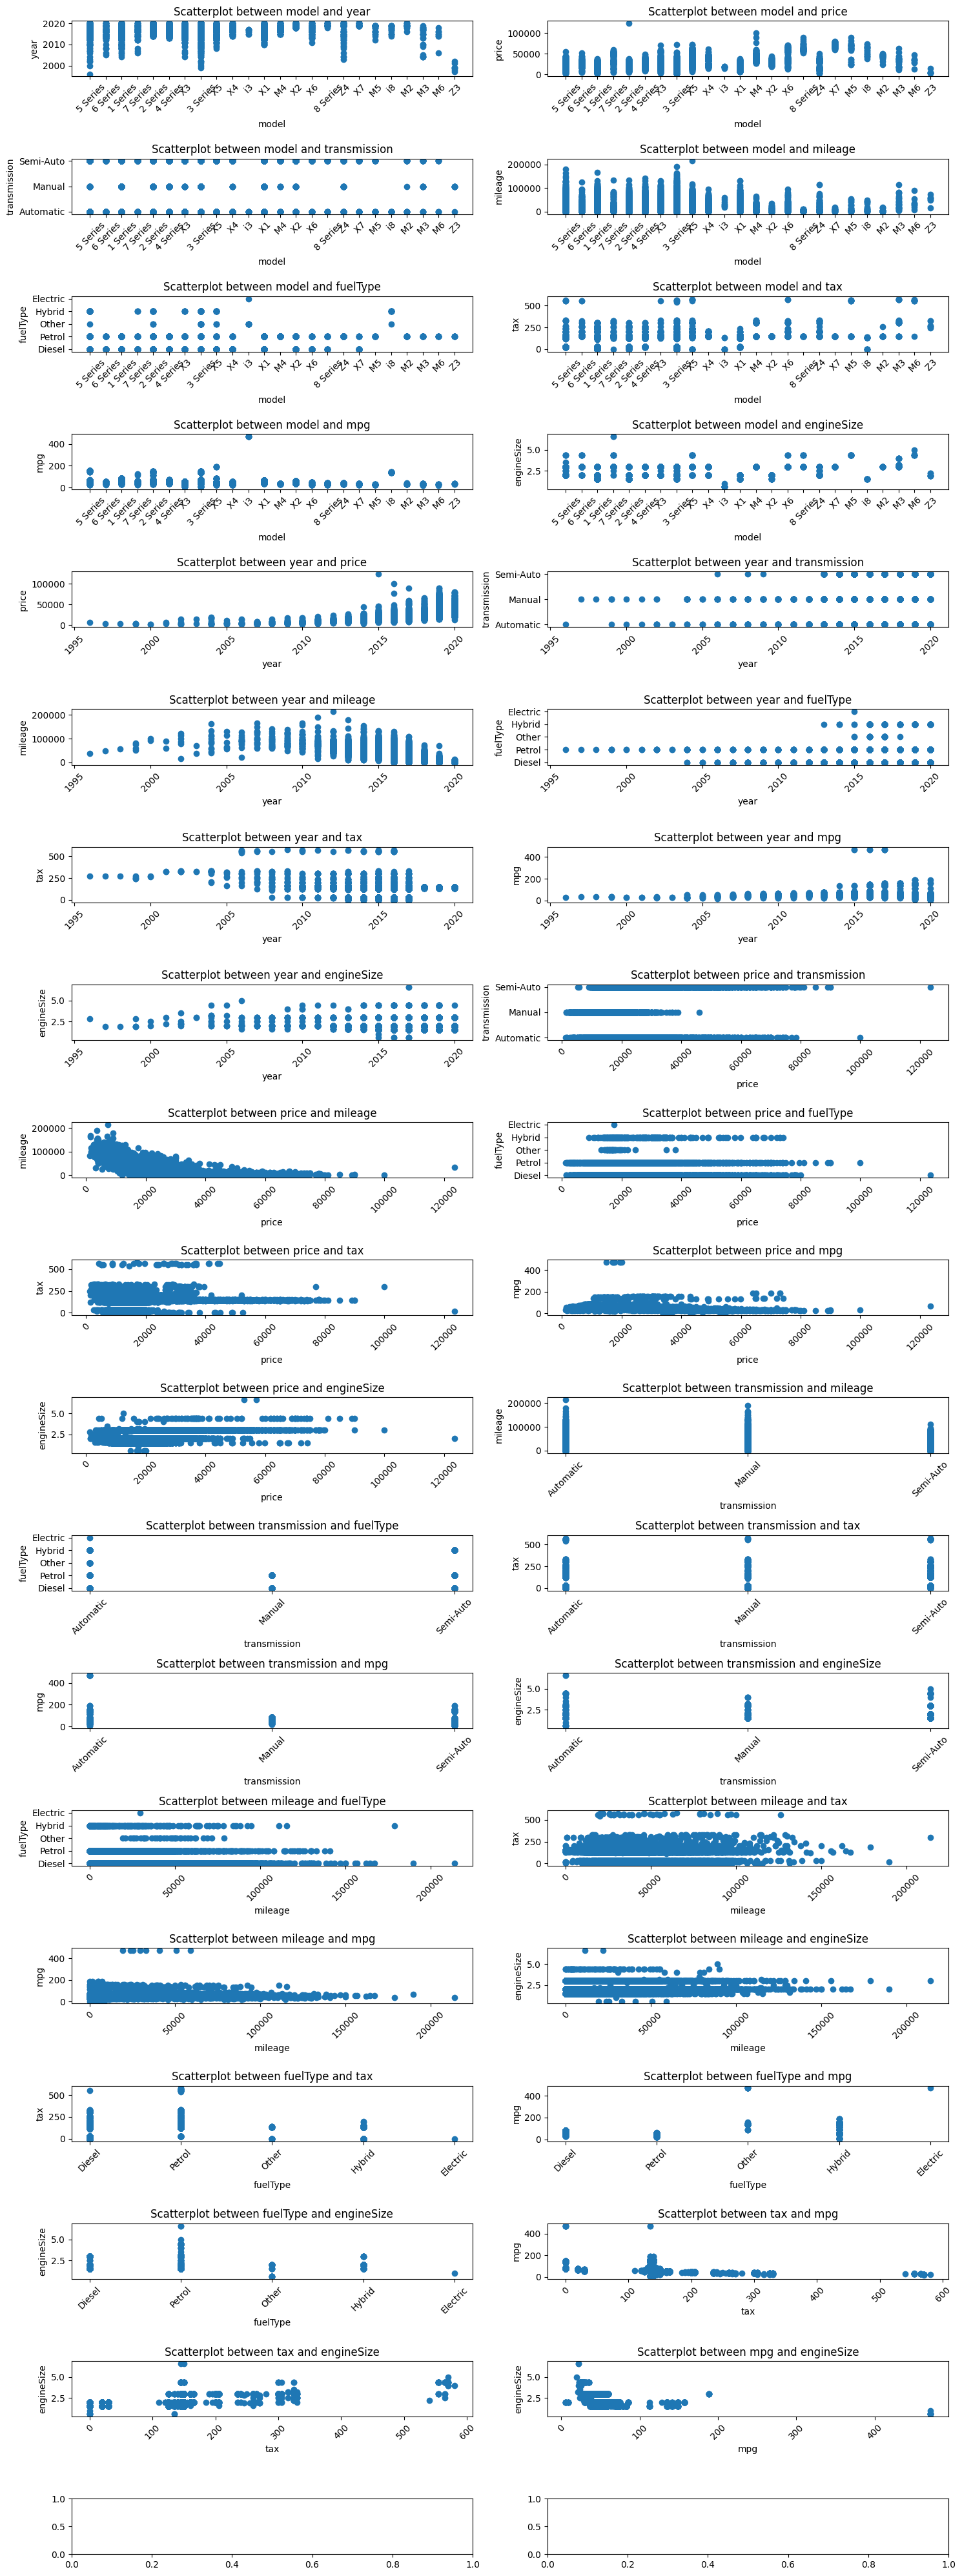

In [29]:
# create scatterplots for each pair
num_plots = len(column_pairs)
fig, axes = plt.subplots(num_plots // 2 + 1, 2, figsize = (15,40))

for i, pair in enumerate(column_pairs):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.scatter(df[pair[0]], df[pair[1]])
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
    ax.tick_params(axis = "x", rotation = 45)
    ax.set_title(f"Scatterplot between {pair[0]} and {pair[1]}")

plt.tight_layout()

The scatterplot contain important information. The most noteworthy relationships that are important for the used car market are:
- The more recent the year of production, the greater the range of prices and the higher the maximum price.
- There seems to be no linear relationship between year and mileage: very old cars and very new cars on average tend to be have low mileage. In between, the mileage has a broad range. 
- Generally, the higher the mileage, the lower the price.
- Semi-auto and automatic cars tend to have higher prices than manual cars.
- There is no clear pattern when it comes to the relation between price and fuel type.

Given the detected patterns, the relation between price, mileage and year is particularly interesting. Let's visualise it in a three dimensional plot.

The 3D scatterplot shows that a lot of datapoints cluster.Nonetheless, the relations are not necessarily linear and point towards different directions.

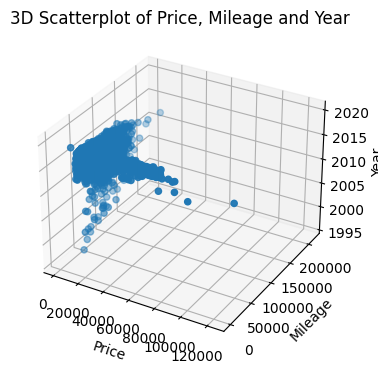

In [30]:
plt.figure(figsize = (3.5, 6))
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(df["price"], df["mileage"], df["year"])
plot_axes.set_xlabel('Price')
plot_axes.set_ylabel('Mileage')
plot_axes.set_zlabel('Year', rotation = 90)
plot_axes.set_title('3D Scatterplot of Price, Mileage and Year')
plt.tight_layout()

Now, I create histograms for all numeric variables.

In [31]:
df_numeric = df.select_dtypes(include=['float', 'int'])

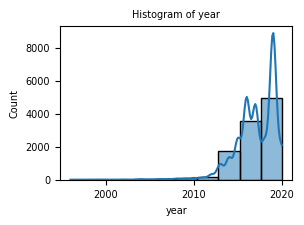

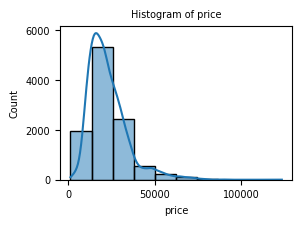

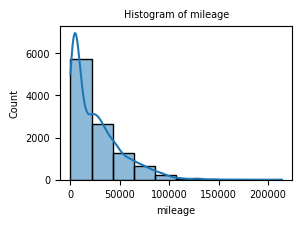

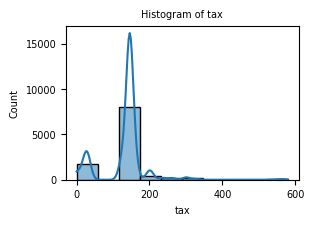

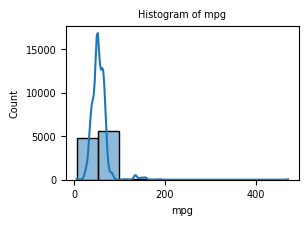

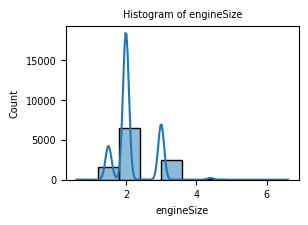

In [32]:
for i, col in enumerate(df_numeric):
    plt.figure(figsize = (3,2))
    sns.histplot(df_numeric[col], kde = True, bins = 10)
    plt.title(f"Histogram of {col}", fontsize = 7)
    plt.xlabel(f"{col}", fontsize = 7)
    plt.ylabel('Count', fontsize = 7)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)

The histograms show that most variables' data is not normally distributed. 

Correlation:
For depicting a correlation matrix, I need to encode all categorical variables. After creating a copy of the dataset for this purpose, I do so using the Label Encoder.

On the one hand, the bivariate correlations between price, model and year are particularly low. On the other hand, the bivariate correlations between year, price and mileage are particulary high. Since we have already looked deeper into this relationship, not further investigation is done.

In [33]:
df_copy = df.copy()

In [34]:
encoder = LabelEncoder()
df_copy["model"] = encoder.fit_transform(df_copy["model"])
df_copy["transmission"] = encoder.fit_transform(df_copy["transmission"])
df_copy["fuelType"] = encoder.fit_transform(df_copy["fuelType"])

Text(0.5, 1.0, 'Correlation Matrix')

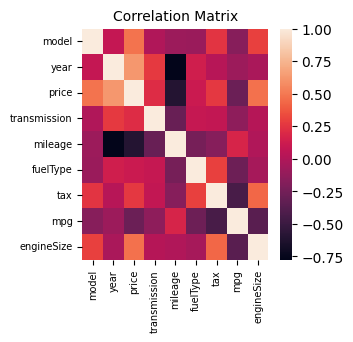

In [35]:
plt.figure(figsize = (3,3))
corr = df_copy.corr()
sns.heatmap(corr)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.title("Correlation Matrix", fontsize = 10)

#  Preprocessing

To prepare for model development, I now encode the original dataset.

In [36]:
df["model"] = encoder.fit_transform(df["model"])
df["transmission"] = encoder.fit_transform(df["transmission"])
df["fuelType"] = encoder.fit_transform(df["fuelType"])

Now, I check for outliers. I use the Inter Quartile Range (IQR) method. An alternative would be the z-score method, however, this assumes that the data is normally distributed. The histograms show that this is not the case. The IQR is more robust in this case.

In [37]:
outlier_values = {}

for i, col in enumerate(df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_values[col] = df[col][outliers]

In the columns tax and engine size the outliers are considerable. However, imputing or deleting the outliers would distort the informative value of the variables. Note that engineSize is a former categorical variable which makes the interpretation of outliers more difficult.

In [38]:
for col, outliers in outlier_values.items():
    length = len(outliers) / len(df[col])
    print(f"Share of outliers in '{col}': {length}")

Share of outliers in 'model': 0.0
Share of outliers in 'year': 0.01987378732221908
Share of outliers in 'price': 0.044362814354337386
Share of outliers in 'transmission': 0.0
Share of outliers in 'mileage': 0.027503061128379015
Share of outliers in 'fuelType': 0.0
Share of outliers in 'tax': 0.2536498069134407
Share of outliers in 'mpg': 0.02251106715644721
Share of outliers in 'engineSize': 0.3870208156729773


In [39]:
df["tax"].value_counts().sort_index()

tax
0       315
20      480
30      983
110       1
120       4
125     841
130       1
135     110
140      32
145    5275
150    1229
155       1
160     431
165     116
185       1
190       2
195       3
200     337
205      98
235      71
240      13
245       2
250       1
255       1
260      60
265      14
270       5
280       1
300      84
305      25
315       3
325      26
330      12
540       1
555      17
565       9
570      11
580       1
Name: count, dtype: int64

In [40]:
df["engineSize"].value_counts().sort_index()

engineSize
0.6       7
1.0       1
1.5    1426
1.6     108
1.9       5
2.0    6508
2.2       6
2.5      14
2.8       2
3.0    2447
3.2       5
3.5       1
4.0       5
4.4      79
5.0       1
6.6       2
Name: count, dtype: int64

Now, I scale the data, which is a crucial step for many ML models. Note, that I only scale the variables that will be the x variables. The target variable price is not scaled.

In [41]:
X = df.drop(columns = "price")

In [42]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.20618878, -1.30553519, -1.27416779, ..., -0.11242347,
         0.12051364, -0.33632424],
       [-0.03909419,  0.39711716, -1.27416779, ...,  0.21418755,
        -0.59619983, -0.33632424],
       [-0.20618878, -0.45420902, -1.27416779, ...,  0.45914581,
        -0.17973119,  1.53455205],
       ...,
       [-0.54037796, -0.02854593, -0.12325411, ...,  1.11236785,
        -0.59619983, -0.33632424],
       [-0.87456715, -1.30553519, -1.27416779, ..., -1.6638258 ,
         0.44012911, -0.33632424],
       [ 1.29766255, -0.02854593, -1.27416779, ..., -0.11242347,
         0.12051364, -0.33632424]])

# Model Development

I will only develop selected ML models. I refrain from deploying a Linear Regression model, since the data is not necessarily linearly distributed (see scatterplots).
Instead, I will explore four promising models: Support Vector Machine, KNN, Random Forest and XGBoost by fitting the data to the all models with the default settings. However, I fine-tune only the hyperparameters of model with the best R-score and MSE that result from the default settings.

# Model Development: Split dataset into training, testing and validation sets

In [44]:
y = df["price"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [46]:
X_train.shape

(8493, 8)

In [47]:
y_train.shape

(8493,)

In [48]:
X_test.shape

(2124, 8)

In [49]:
y_test.shape

(2124,)

# Model Development: Narrow Down Model

I run the selected models with the default settings. Both R2 and MSE suggest that XGBoost have the best fit. Note, however, that Random Forest is a promising alternative. In a real-world scenario, I would explore this model further as well. For the purpose of this exercise, however, I only finetune a XGBoost model.

In [50]:
models = [SVR(), KNeighborsRegressor(), RandomForestRegressor(random_state = 12), xgboost.XGBRegressor()]

In [51]:
model_r2 = {}
model_mse = {}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_r2[model] = r2_score(y_test, y_pred)
    model_mse[model] = mean_squared_error(y_test, y_pred)   

In [52]:
model_r2

{SVR(): 0.07420230734323785,
 KNeighborsRegressor(): 0.5506744827366166,
 RandomForestRegressor(random_state=12): 0.9466559054957386,
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 0.9495504970779969}

In [53]:
model_mse

{SVR(): 114950300.8609486,
 KNeighborsRegressor(): 55789838.10783428,
 RandomForestRegressor(random_state=12): 6623390.575561866,
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 6263987.894080439}

In [54]:
max(model_r2, key=model_r2.get)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
min(model_mse, key=model_mse.get)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Hence, moving forward, I will deploy a XGBoost Regression model. 
It is a machine learning algorithm for regression tasks. It leverages ensemble learning, combining the predictions of multiple decision trees to create a robust model. Key features include gradient descent optimization, regularization to prevent overfitting, and tree pruning for model simplicity. XGBoost also supports cross-validation, aiding model selection and performance assessment. It provides valuable feature importance insights and can handle large datasets efficiently. Widely used in finance, healthcare, and more, XGBoost regression excels in predictive accuracy and is favored for its versatility and robustness.

# Model Development: Hyperparameter Tuning

In [56]:
model = xgboost.XGBRegressor()

I manually narrow down the parameters that are tuned. Note that this can alter the results. I limit the number of parameters to limit computing time.

The R2 score of the hyperparameters 

'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 50,
 'reg_lambda': 0.1,
 'subsample': 0.9 
 
 is 0.95, which is very good. However, it is not better than of the standard default hyperparameters. Therefore, from now on I proceed with the default hyperparameters.

In [57]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_child_weight': [1,2,3,4,5],
    'n_estimators': [10,25,30,50,100,200],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1],
    'reg_lambda': [0.001, 0.01, 0.1], 
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=2, 
                           scoring="r2",
                          )
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 5400 candidates, totalling 21600 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 25, 30, 50, 100, 200],
                         'reg_lambda': [0.001, 0.01, 0.1],
                         'subsample': [0.7, 0.8, 0.9, 1]},
             scoring='r2', verbose=2)

In [58]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 50,
 'reg_lambda': 0.1,
 'subsample': 0.9}

In [59]:
grid_search.best_score_

0.9474864556678662

I now train the model with default hyperparameters.

In [61]:
model = xgboost.XGBRegressor()

In [62]:
model.fit(X_train, y_train)   

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

The feature 'engineSize' (0.54) and 'year' (0.29) are the most important features. The other features remain below 0.1. The importance of features depends on how often each feature is used to split the data across all the trees in the ensemble and how much each split point improves the model's performance in terms of reducing impurity.

In [64]:
model.feature_names_in_

array(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'], dtype='<U12')

In [67]:
feature_importance = model.feature_importances_
feature_importance

array([0.06709383, 0.29505625, 0.01074282, 0.0322211 , 0.01367242,
       0.01364311, 0.02269991, 0.54487056], dtype=float32)

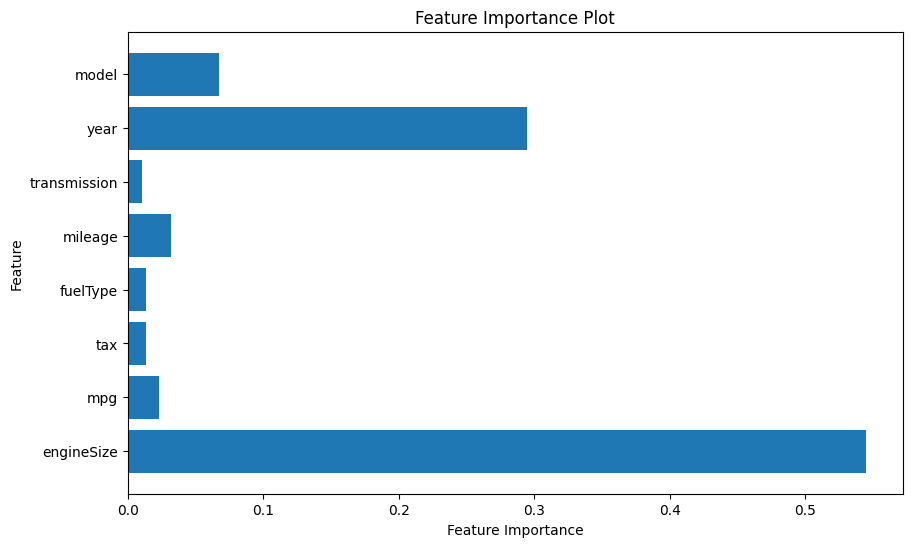

In [68]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, tick_label=grid_search.feature_names_in_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  
plt.show()

Now, we predict based on the fitted model.

In [69]:
y_pred_train = model.predict(X_train)

In [70]:
y_pred_test = model.predict(X_test)

In [71]:
print(r2_score(y_pred_train, y_train), mean_squared_error(y_pred_train, y_train))

0.984772613951043 1970335.1997018717


In [72]:
print(r2_score(y_pred_test, y_test), mean_squared_error(y_pred_test, y_test))

0.9487204615053718 6263987.894080439


Let's visualise the performance by means of scatterplots. As expected, on average the actual and predicted values of the training dataset slightly more correspond to each other. However, on average the actual and predicted values of the training dataset cluster as well, but has more outliers. As the R2 metric implies, the predictive power of the model is still quite high.

In [73]:
min_value_train = min(y_train.min(), y_pred_train.min())
max_value_train = max(y_train.max(), y_pred_train.max())
line_values_train = np.linspace(min_value_train, max_value_train, num=len(y_train))

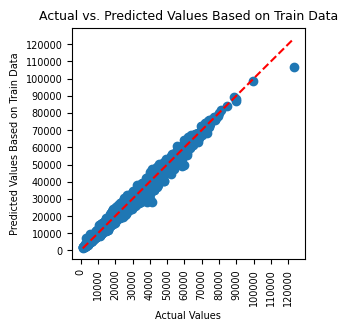

In [74]:
plt.figure(figsize = (3,3))
plt.scatter(y_train, y_pred_train)
plt.plot(line_values_train, line_values_train, color='red', linestyle='--', label='Actual = Predicted')
plt.xlabel("Actual Values", fontsize = 7)
plt.ylabel("Predicted Values Based on Train Data", fontsize = 7)
plt.locator_params(axis='x', nbins=20)
plt.xticks(rotation = 90, fontsize = 7)
plt.locator_params(axis='y', nbins=20)
plt.yticks(fontsize = 7)
plt.title("Actual vs. Predicted Values Based on Train Data", fontsize = 9)
plt.show()

In [75]:
min_value_test = min(y_test.min(), y_pred_test.min())
max_value_test = max(y_test.max(), y_pred_test.max())
line_values_test = np.linspace(min_value_test, max_value_test, num=len(y_test))

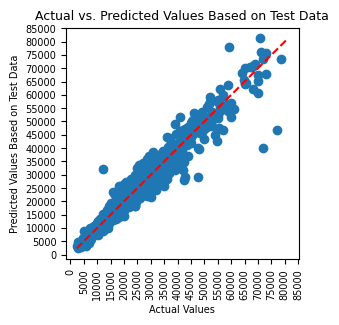

In [76]:
plt.figure(figsize = (3,3))
plt.scatter(y_test, y_pred_test)
plt.plot(line_values_test, line_values_test, color='red', linestyle='--', label='Actual = Predicted')
plt.xlabel("Actual Values", fontsize = 7)
plt.ylabel("Predicted Values Based on Test Data", fontsize = 7)
plt.locator_params(axis='x', nbins=20)
plt.xticks(rotation = 90, fontsize = 7)
plt.locator_params(axis='y', nbins=20)
plt.yticks(fontsize = 7)
plt.title("Actual vs. Predicted Values Based on Test Data", fontsize = 9)
plt.show()

The scatterplot of the residuals shows that the residuals scatter around 0 - even though not completely randomly since they show higher dispersion in the mid-range.

In [77]:
res_train = y_train - y_pred_train

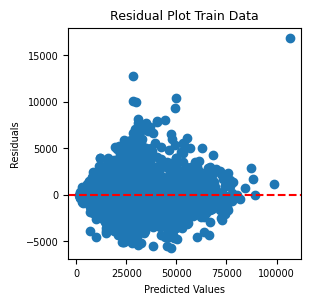

In [78]:
plt.figure(figsize = (3,3))
plt.scatter(y_pred_train, res_train)
plt.xlabel("Predicted Values", fontsize = 7)
plt.xticks(fontsize = 7)
plt.ylabel("Residuals", fontsize = 7)
plt.yticks(fontsize = 7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot Train Data", fontsize = 9)
plt.show()

In [79]:
res_test = y_test - y_pred_test

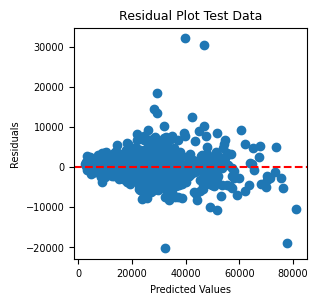

In [80]:
plt.figure(figsize = (3,3))
plt.scatter(y_pred_test, res_test)
plt.xlabel("Predicted Values", fontsize = 7)
plt.xticks(fontsize = 7)
plt.ylabel("Residuals", fontsize = 7)
plt.yticks(fontsize = 7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot Test Data", fontsize = 9)
plt.show()

Note that Gradient Boosting is sensitive to outliers. This implies that in a real-world scenario I would find a way to handle identified outliers.